In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import factorial
import numpy as np, scipy.stats as st

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
sns.set_style("darkgrid")

In [4]:
def coin_generator(num_of_toss):
    
    """Takes the number of tosses as an argument and 
    returns the expectation value of the total tossess
    for heads=1,tails=0,for a fair coin."""
    
    n = num_of_toss
    
    
    b=[]
    face = []
    for i in range(n):
        a = np.random.uniform(0.45,0.55)
        if a >0.5:
            face.append(1)
        else:
            face.append(0)
            
    heads = face.count(1)
    tails = face.count(0)
    avg_val = np.sum(face)/n       
    
    return avg_val
    

In [10]:
coin_generator(200)

0.51

In [30]:
def coin_toss_dist(n,m,plot=True):
    # n is the number of samples
    # m is the number of tosses in each sample
    
    
    tot_heads= []
    for i in range(n):
        tot_heads.append(coin_generator(m))
    

    if plot:
        plt.figure(figsize=(12,8))
        plt.hist(tot_heads,bins=np.arange(0,1.05,0.05))
        plt.xlim(0,1)
        plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
        #plt.xticks(list(np.arange(0.0,1.05,0.1)),list(np.arange(0.0,1.05,0.1)))
        plt.title("Expectation value of coin tosses with {0} samples and {1} sample size".format(n,m),fontsize=18)
        plt.xlabel("Expectation value",fontsize=16)
        plt.ylabel("Number of samples",fontsize=16)
        plt.show()
    else:
        return tot_heads
        pass
    
    return 

In [31]:
np.arange(0.0,1.05,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

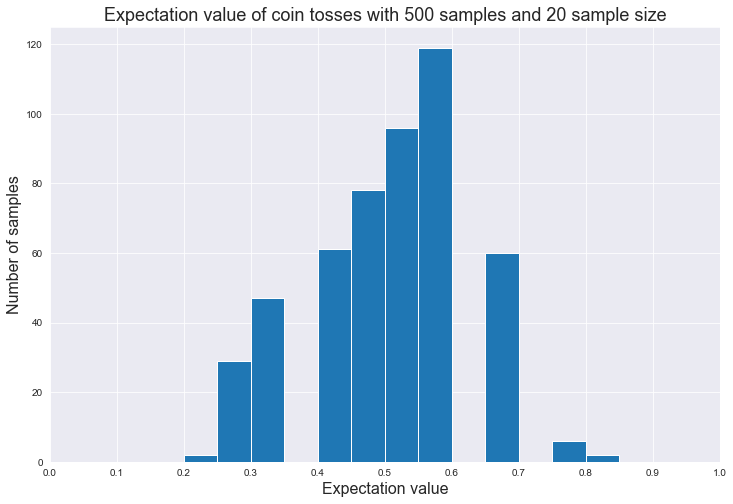

In [33]:
coin_toss_dist(500,20)

In [34]:
interact(coin_toss_dist, n = widgets.IntSlider(min=50, max=1500, step=50, value=300),
         m = widgets.IntSlider(min=10, max=600, step=20, value=20), plot= True)

interactive(children=(IntSlider(value=300, description='n', max=1500, min=50, step=50), IntSlider(value=20, de…

<function __main__.coin_toss_dist(n, m, plot=True)>

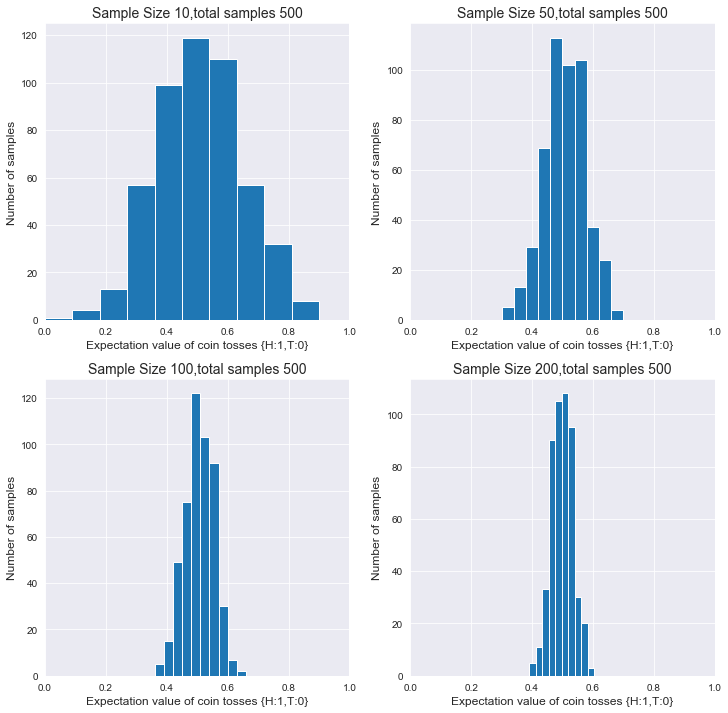

In [12]:
sample_size = [10,50,100,200]
fig = plt.figure(figsize=(12,12))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(coin_toss_dist(500,sample_size[i],plot=False))
    ax.set_xlim(0,1)
    ax.set_xlabel("Expectation value of coin tosses {H:1,T:0}",fontsize=12)
    ax.set_ylabel("Number of samples",fontsize=12)
    ax.set_title("Sample Size {0},total samples {1}".format(sample_size[i],500),fontsize=14)
plt.show()

In [35]:
def plot_coin_toss(n,heads_prob=1/2):
    """n is the number of coin tossess and heads_prob is 
    the probability of heads, by default it is 0.5
    Plots the PDF and CDF of the distribution"""
    
    
    ### Calculating the probability of i heads as i goes from 0 to n using binomial distribution.
    probs=[]
    for i in range(n+1):
        c=0
        c = (factorial(n))/(factorial(i)*factorial(n-i))
        p = c*((heads_prob)**i)*((1-heads_prob)**(n-i))
        probs.append(p)
        
        
    cdf_sum = np.cumsum(probs)
    
    

       
   
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax1.plot(probs)
    ax1.set_xticks(np.arange(0,n+1,10))
    ax1.set_xticklabels(np.arange(0,n+1,10))
    ax1.set_title("PDF of {0} coin tosses with the probablity of"
              " heads equals {1}".format(n,heads_prob),fontsize=14)
    
    ax2.plot(np.linspace(0,1,n+1),cdf_sum)
    #ax2.set_xticks(np.linspace(0,1,n/2))
    #ax2.set_xticklabels(np.linspace(0,1,n/2))
    ax2.set_title("CDF of {0} coin tosses with the probablity of"
              " heads equals {1}".format(n,heads_prob),fontsize=14)
    plt.show()
    
    ### 95% confidence interval
    conf_95 = st.t.interval(0.95, len(cdf_sum)-1, loc=np.mean(cdf_sum), scale=st.sem(cdf_sum))
    a,b = round(conf_95[0],2),round(conf_95[1],2)
    
    print("The 95 % confidence interval is from {0} to {1}".format(a,b))
    
    return 

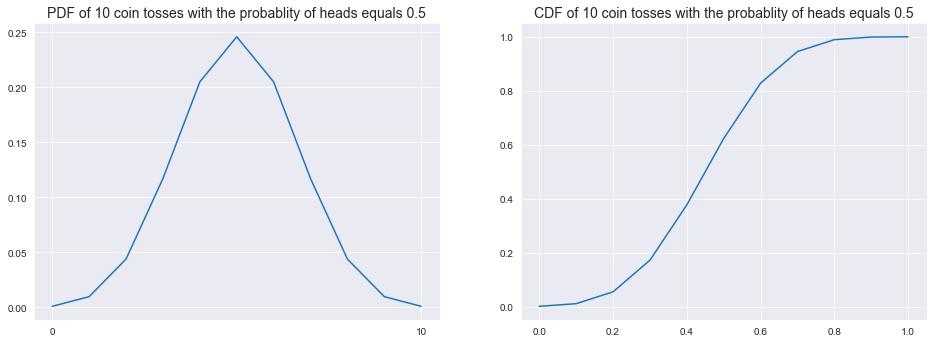

The 95 % confidence interval is from 0.26 to 0.83


In [36]:
plot_coin_toss(10,0.5)

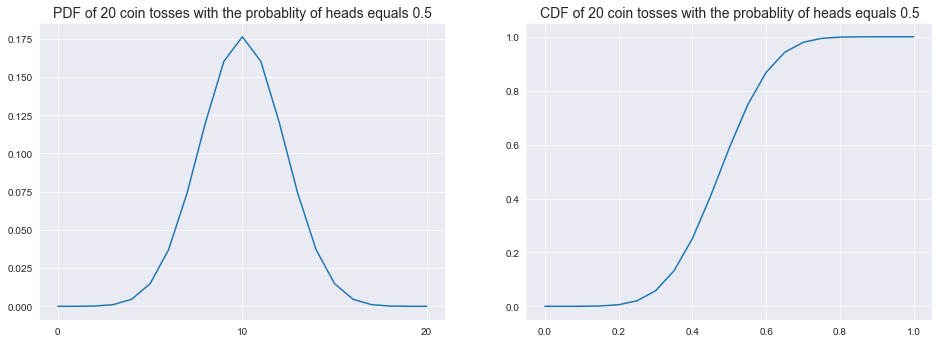

The 95 % confidence interval is from 0.32 to 0.73


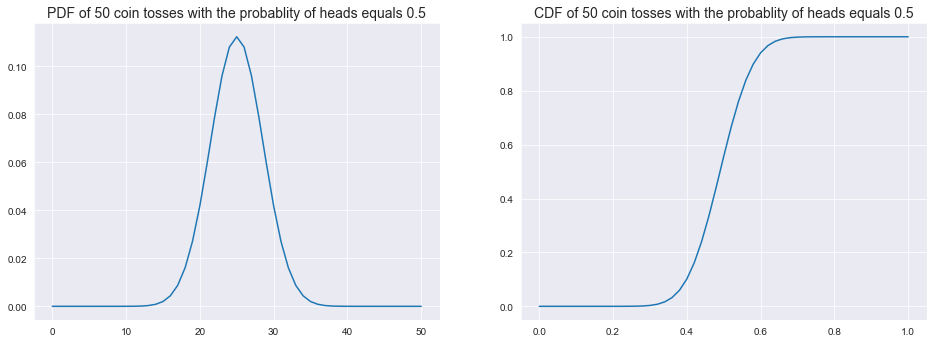

The 95 % confidence interval is from 0.38 to 0.64


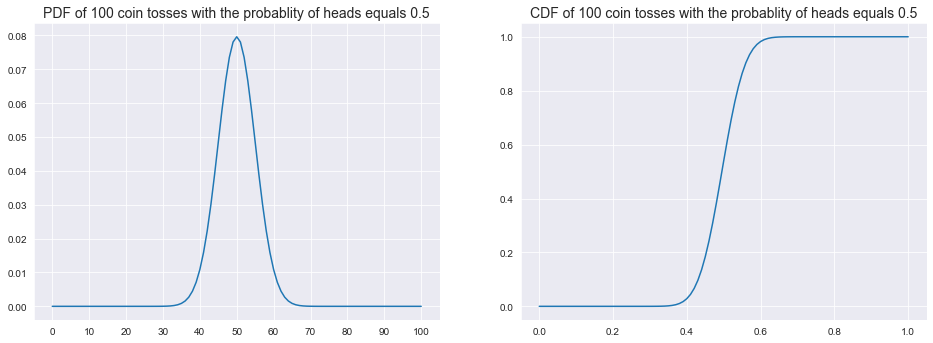

The 95 % confidence interval is from 0.41 to 0.6


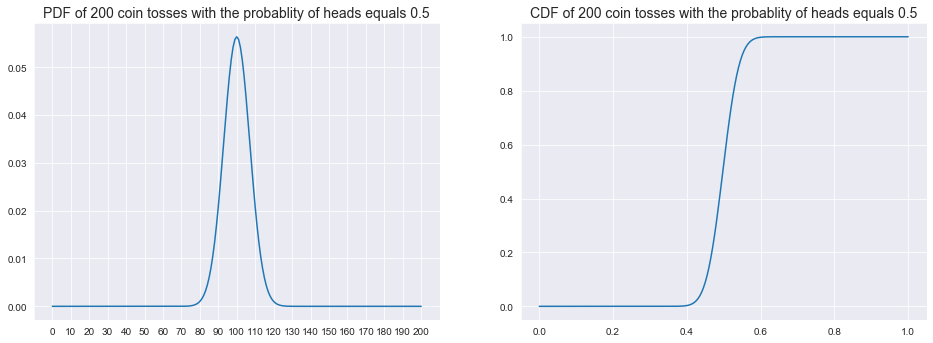

The 95 % confidence interval is from 0.44 to 0.57


In [37]:
for i in [20,50,100,200]:
    plot_coin_toss(i,0.5)